# Proyecto CC5206

Mineria de datos sobre datasets del banco mundial. Eliminar ultimas filas del excel

# Importar librerias y dataset

In [25]:
# encoding=utf8  
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')
import numpy as np
import pandas as pd
import pdb

d_2016 = pd.read_excel('Jobs_proc.xlsx', keep_default_na=False, na_values='')

d_2016.head()

# Eliminar Outliers

In [2]:
#'''
outliers1 = [u'High income', u'High income: OECD', u'OECD members', u'World']
outliers2 = [u'East Asia & Pacific',u'East Asia & Pacific (excluding high income)',
             u'Euro area',u'Europe & Central Asia',u'European Union',u'Low & middle income',
             u'Middle income',u'North America',u'Upper middle income']

outliers3 = [u'Arab World', u'Sub-Saharan Africa',
             u'Sub-Saharan Africa (excluding high income)', u'Middle East & North Africa',
             u'Middle East & North Africa (excluding high income)', 
             u'Latin America & Caribbean',u'Latin America & Caribbean (excluding high income)',
             u'Least developed countries: UN classification', 
             u'Heavily indebted poor countries (HIPC)',u'High income',u'High income: nonOECD',
             u'High income: OECD', u'Euro area',u'Europe & Central Asia',
             u'Europe & Central Asia (excluding high income)',u'European Union',
             u'East Asia & Pacific',u'East Asia & Pacific (excluding high income)',
             u'Lower middle income',u'South Asia']

outliers4 = [u'IDA & IBRD total', u'IDA blend', u'IDA only', u'IDA total',
            u'East Asia & Pacific (IDA & IBRD countries)',u'Europe & Central Asia (IDA & IBRD countries)',
            u'Fragile and conflict affected situations',u'IBRD only',u'Late-demographic dividend',
            u'Latin America & the Caribbean (IDA & IBRD countries)',
            u'Middle East & North Africa (IDA & IBRD countries)',u'Not classified',
            u'Other small states',u'Post-demographic dividend',u'Pre-demographic dividend']


outliers5 = [u'Early-demographic dividend',u'Early-demographic dividend',u'Central Europe and the Baltics',
            u'South Asia (IDA & IBRD)',u'Sub-Saharan Africa (IDA & IBRD countries)',
            u'Sub-Saharan Africa (IDA & IBRD countries)', u'South Asia (IDA & IBRD)']

for out in outliers1:
    d_2016 = d_2016[d_2016['Country Name'] != out]
for out in outliers2:
    d_2016 = d_2016[d_2016['Country Name'] != out]
for out in outliers3:
    d_2016 = d_2016[d_2016['Country Name'] != out]
for out in outliers4:
    d_2016 = d_2016[d_2016['Country Name'] != out]
for out in outliers5:
    d_2016 = d_2016[d_2016['Country Name'] != out]
#paises = xdata['Country Name'].values.tolist()
paises = d_2016['Country Name'].values.tolist()
#xdata.head()

# Normalización

In [3]:
d_2016_n = d_2016
for k in range(2,len(d_2016.keys())):
    
    llave = d_2016.keys()[k]
    valores = d_2016[llave] 
    xvals = valores.tolist()
    #Normalización
    xmax = np.nanmax(valores)
    xmin = np.nanmin(valores)
    norm = xmax - xmin
    #pdb.set_trace()
    if (not np.isnan(xmax)) and norm!=0:
            d_2016_n[llave] = (d_2016[llave]-xmin)/norm
    

d_2016_n.head()

,Country Name,Country Code,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),Agriculture value added per worker (constant 2005 US$),"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)","Agriculture, value added (constant 2005 US$)","Air transport, registered carrier departures worldwide",...,"Total employment, total (ages 15+)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population,Urban population (% of total),Weeks of severance pay for redundancy of experienced workers
0,Afghanistan,AFG,0.391026,0.371760,0.759386,0.001878,0.389207,0.512795,0.007236,0.002658,...,0.009424,0.309091,0.216301,0.250814,0.290743,0.268128,0.281407,0.011169,0.193898,0.100000
1,Albania,ALB,1.000000,0.098201,0.288206,0.023421,0.368167,0.514480,0.006235,0.000209,...,0.001247,0.350649,0.545455,0.511401,0.307692,0.531197,0.469012,0.002170,0.523335,0.164835
2,Algeria,DZA,1.000000,0.045225,0.357783,0.022219,0.162579,0.689702,0.031894,0.006238,...,0.014095,0.428571,0.257053,0.309446,0.498044,0.345700,0.390285,0.036755,0.673362,0.050000
5,Angola,AGO,0.326923,0.816776,0.873489,0.004762,0.153240,0.499085,0.015177,0.001446,...,0.010228,0.179221,0.197492,0.211726,0.138201,0.161889,0.165829,0.014095,0.379705,0.208333
6,Antigua and Barbuda,ATG,0.902515,0.217909,0.303293,0.013607,0.036433,0.485343,0.000050,0.004858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.171022,0.184615


# Analisis Estadistico

In [4]:
varianzas = []
promedios = []
maximos = []
minimos = []
desv = []
for k in range(2,len(d_2016_n.keys())):
    
    llave = d_2016_n.keys()[k]
    valores = d_2016_n[llave] 
    count = 0
    
    #Normalización
    xmax = np.nanmax(valores)
    xmean = np.nanmean(valores)
    xmin = np.nanmin(valores)
    xstd = np.nanstd(valores)
    xvar = np.nanvar(valores)
    if np.isnan(xvar):
        print llave
    
    promedios.append(xmean)
    minimos.append(xmin)
    maximos.append(xmax)
    desv.append(xstd)
    varianzas.append(xvar)
    
sort = np.sort(varianzas)

most = -1   

print "Estadisticas con mayor varianza:"
#pdb.set_trace()
for i in range(10):
    value = sort[most]
    j = np.argwhere(varianzas == sort[most])+2
    features = d_2016_n.keys()
    print str(i+1)+' '+str(features[j])+' ('+str(sort[most]) +')'
    most-=1


Estadisticas con mayor varianza:
1 Index([[u'Depth of credit information index (0=low to 8=high)']], dtype='object') (0.154126922934)
2 Index([[u'Private credit bureau coverage (% of adults)']], dtype='object') (0.137269999768)
3 Index([[u'Do legal provisions mandate equal pay for equal work (1=Yes, 0=No)?']], dtype='object') (0.114337315138)
4 Index([[u'Roads, paved (% of total roads)']], dtype='object') (0.113718303798)
5 Index([[u'Access to electricity (% of population)']], dtype='object') (0.106486217041)
6 Index([[u'Internet users (per 100 people)']], dtype='object') (0.0882086883841)
7 Index([[u'Ease of doing business index (1=most business-friendly regulations)']], dtype='object') (0.0856155353659)
8 Index([[u'Fuel exports (% of merchandise exports)']], dtype='object') (0.0819075384232)
9 Index([[u'Population ages 0-14 (% of total)']], dtype='object') (0.0777036373466)
10 Index([[u'School enrollment, tertiary, female (% gross)']], dtype='object') (0.075188045982)


# Graficos

## Histogramas

## Codo

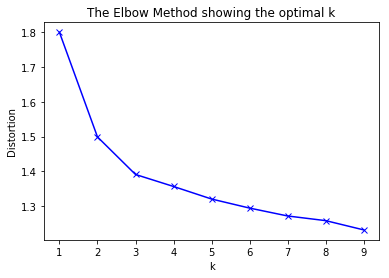

In [5]:
np_df = d_2016_n.as_matrix()
test = np_df[:,2:]
for row in range(test.shape[0]):
    for column in range(test.shape[1]):
        val = test[row][column]
        #print val
        if np.isnan(val):
            test[row][column]= promedios[column] 
        else:
            #test[row][column]= val/maximos[column] 
            pass

xdf = pd.DataFrame(test)

vectors = []
tot = test#.T
for i in range(len(tot[:,0])):
    vectors.append(tot[i])
    

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
from scipy.spatial.distance import cdist

X = tot

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# TSNE

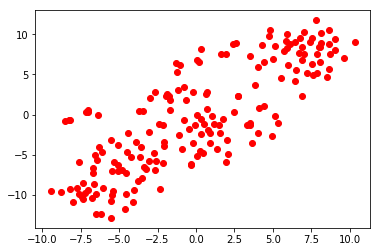

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = vectors
X_embedded = TSNE(n_components=2,n_iter=100000000).fit_transform(X)
X_embedded.shape
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c="r", cmap=plt.cm.Spectral)
plt.show()

# PCA

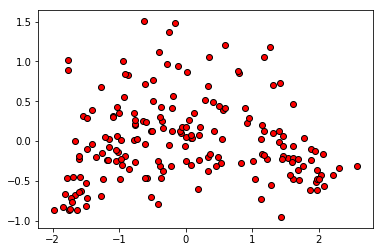

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

X = tot
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)


plt.scatter(X[:, 0], X[:, 1], c="r", cmap=plt.cm.spectral,
           edgecolor='k')


plt.show()

# clustering

In [8]:
from sklearn.cluster import KMeans
from sklearn import datasets

X = tot

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_

centroids = kmeans.cluster_centers_



# tSNE

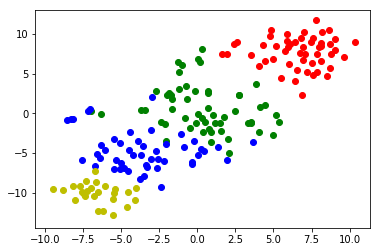

In [9]:
r = []
r_l = []
g = []
g_l = []
b = [] 
b_l = []
y = []
y_l = []
c=[]
c_l=[]
m=[]
m_l=[]

r_embedded = TSNE(n_components=2,n_iter=100000000).fit_transform(X)
r_embedded.shape
for k in range(len(labels)):
    if labels[k]==0:
        r.append(X_embedded[k])
        r_l.append(paises[k])
    elif labels[k]==1:
        g.append(X_embedded[k])
        g_l.append(paises[k])
    elif labels[k]==2:
        b.append(X_embedded[k])
        b_l.append(paises[k])
    elif labels[k]==3:
        y.append(X_embedded[k])
        y_l.append(paises[k])
    elif labels[k]==4:
        c.append(X_embedded[k])
        c_l.append(paises[k])
    elif labels[k]==5:
        m.append(X_embedded[k])
        m_l.append(paises[k])
plt.scatter([item[0] for item in r], [item[1] for item in r], c="r", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in g], [item[1] for item in g], c="g", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in b], [item[1] for item in b], c="b", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in y], [item[1] for item in y], c="y", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in c], [item[1] for item in c], c="c", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in m], [item[1] for item in m], c="m", cmap=plt.cm.Spectral)
plt.show()

# PCA 

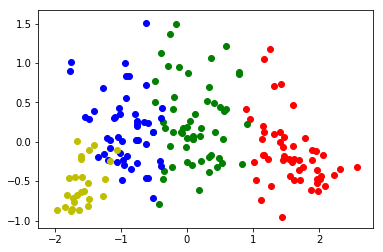

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets


X = tot
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

r = []
r_l = []
g = []
g_l = []
b = [] 
b_l = []
y = []
y_l = []
c = []
c_l = []

for k in range(len(labels)):
    if labels[k]==0:
        r.append(X[k])
        r_l.append(paises[k])
    elif labels[k]==1:
        g.append(X[k])
        g_l.append(paises[k])
    elif labels[k]==2:
        b.append(X[k])
        b_l.append(paises[k])
    elif labels[k]==3:
        y.append(X[k])
        y_l.append(paises[k])
    elif labels[k]==4:
        c.append(X[k])
        c_l.append(paises[k])
        
plt.scatter([item[0] for item in r], [item[1] for item in r], c="r", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in g], [item[1] for item in g], c="g", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in b], [item[1] for item in b], c="b", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in y], [item[1] for item in y], c="y", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in c], [item[1] for item in c], c="c", cmap=plt.cm.Spectral)
plt.show()

In [11]:
r_l

[u'Afghanistan',
 u'Angola',
 u'Bangladesh',
 u'Benin',
 u'Burkina Faso',
 u'Burundi',
 u'Cambodia',
 u'Cameroon',
 u'Central African Republic',
 u'Chad',
 u'Comoros',
 u'Congo, Dem. Rep.',
 u'Congo, Rep.',
 u"Cote d'Ivoire",
 u'Djibouti',
 u'Equatorial Guinea',
 u'Eritrea',
 u'Ethiopia',
 u'Gambia, The',
 u'Guinea',
 u'Guinea-Bissau',
 u'Haiti',
 u'Kenya',
 u'Lao PDR',
 u'Lesotho',
 u'Liberia',
 u'Low income',
 u'Madagascar',
 u'Malawi',
 u'Mali',
 u'Mauritania',
 u'Mozambique',
 u'Myanmar',
 u'Nepal',
 u'Niger',
 u'Nigeria',
 u'Papua New Guinea',
 u'Rwanda',
 u'Sao Tome and Principe',
 u'Senegal',
 u'Sierra Leone',
 u'Solomon Islands',
 u'Sudan',
 u'Tanzania',
 u'Timor-Leste',
 u'Togo',
 u'Uganda',
 u'Vanuatu',
 u'Yemen, Rep.',
 u'Zambia',
 u'Zimbabwe']

In [12]:
g_l

[u'Algeria',
 u'Antigua and Barbuda',
 u'Azerbaijan',
 u'Bahamas, The',
 u'Belize',
 u'Bhutan',
 u'Bolivia',
 u'Botswana',
 u'Brunei Darussalam',
 u'Cabo Verde',
 u'China',
 u'Ecuador',
 u'Egypt, Arab Rep.',
 u'El Salvador',
 u'Fiji',
 u'Gabon',
 u'Ghana',
 u'Grenada',
 u'Guatemala',
 u'Guyana',
 u'Honduras',
 u'India',
 u'Indonesia',
 u'Iraq',
 u'Jamaica',
 u'Jordan',
 u'Kyrgyz Republic',
 u'Libya',
 u'Maldives',
 u'Mongolia',
 u'Morocco',
 u'Namibia',
 u'Nicaragua',
 u'Oman',
 u'Pakistan',
 u'Panama',
 u'Paraguay',
 u'Peru',
 u'Philippines',
 u'Samoa',
 u'Seychelles',
 u'South Africa',
 u'Sri Lanka',
 u'St. Lucia',
 u'St. Vincent and the Grenadines',
 u'Suriname',
 u'Swaziland',
 u'Syrian Arab Republic',
 u'Tajikistan',
 u'Tonga',
 u'Trinidad and Tobago',
 u'Tunisia',
 u'Uzbekistan',
 u'Venezuela, RB',
 u'Vietnam',
 u'West Bank and Gaza']

In [13]:
b_l

[u'Albania',
 u'Argentina',
 u'Armenia',
 u'Bahrain',
 u'Barbados',
 u'Belarus',
 u'Bosnia and Herzegovina',
 u'Brazil',
 u'Bulgaria',
 u'Chile',
 u'Colombia',
 u'Costa Rica',
 u'Croatia',
 u'Cuba',
 u'Cyprus',
 u'Czech Republic',
 u'Dominican Republic',
 u'Estonia',
 u'Georgia',
 u'Greece',
 u'Hungary',
 u'Iran, Islamic Rep.',
 u'Italy',
 u'Kazakhstan',
 u'Kuwait',
 u'Latvia',
 u'Lebanon',
 u'Lithuania',
 u'Macedonia, FYR',
 u'Malaysia',
 u'Mauritius',
 u'Mexico',
 u'Moldova',
 u'Montenegro',
 u'Poland',
 u'Portugal',
 u'Puerto Rico',
 u'Qatar',
 u'Romania',
 u'Russian Federation',
 u'Saudi Arabia',
 u'Serbia',
 u'Slovak Republic',
 u'Spain',
 u'Thailand',
 u'Turkey',
 u'Ukraine',
 u'United Arab Emirates',
 u'Uruguay']

In [14]:
y_l

[u'Australia',
 u'Austria',
 u'Belgium',
 u'Canada',
 u'Denmark',
 u'Finland',
 u'France',
 u'Germany',
 u'Hong Kong SAR, China',
 u'Iceland',
 u'Ireland',
 u'Israel',
 u'Japan',
 u'Korea, Rep.',
 u'Luxembourg',
 u'Macao SAR, China',
 u'Malta',
 u'Netherlands',
 u'New Zealand',
 u'Norway',
 u'Singapore',
 u'Slovenia',
 u'Sweden',
 u'Switzerland',
 u'United Kingdom',
 u'United States']

In [15]:
c_l

[]

In [16]:
m_l

[]

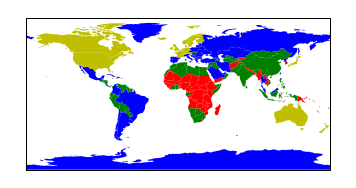

In [31]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import itertools
import numpy as np

shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',
                                        category='cultural', name=shapename)

# some nice "earthy" colors


ax = plt.axes(projection=ccrs.PlateCarree())
for country in shpreader.Reader(countries_shp).records():
    if any(country.attributes['NAME_LONG'] in x for x in r_l):
        color = 'r'
    elif any(country.attributes['NAME_LONG'] in x for x in g_l):
        color = 'g'
    elif any(country.attributes['NAME_LONG'] in x for x in b_l):
        color = 'b'
    elif any(country.attributes['NAME_LONG'] in x for x in y_l):
        color = 'y'
    ax.add_geometries(country.geometry, ccrs.PlateCarree(),
    facecolor=color,
    label=country.attributes['NAME_LONG'])

plt.show()